<a href="https://colab.research.google.com/github/0v3r-9000/design/blob/main/TumorTypeIDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt


In [58]:
dffeatures = pd.read_csv('data.csv')
dftarget = pd.read_csv('labels.csv')

In [62]:
print(dftarget)
print(dffeatures)

df = dffeatures.merge(dftarget, on='Unnamed: 0')
df

     Unnamed: 0 Class
0      sample_0  PRAD
1      sample_1  LUAD
2      sample_2  PRAD
3      sample_3  PRAD
4      sample_4  BRCA
..          ...   ...
796  sample_796  BRCA
797  sample_797  LUAD
798  sample_798  COAD
799  sample_799  PRAD
800  sample_800  PRAD

[801 rows x 2 columns]
     Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0      sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1      sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2      sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3      sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4      sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   
..          ...     ...       ...       ...       ...        ...     ...   
121  sample_121     0.0  3.389539  2.371364  6.505319   9.955465     0.0   
122  sample_122     0.0  3.424210  3.536202  6.387861   9.027292     0.0   
123  sample_123     0.0  2.2

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,sample_121,0.0,3.389539,2.371364,6.505319,9.955465,0.0,6.636691,1.561008,0.0,...,8.551466,10.492714,0.722641,9.980282,11.557775,10.700613,9.855224,3.739168,0.0,KIRC
122,sample_122,0.0,3.424210,3.536202,6.387861,9.027292,0.0,8.828394,0.000000,0.0,...,8.587706,10.222348,5.498529,10.028348,11.416323,10.522091,8.617243,8.369802,0.0,LUAD
123,sample_123,0.0,2.257765,3.514286,7.128232,9.710548,0.0,9.556673,0.985428,0.0,...,8.882188,9.743905,3.972582,9.275701,11.505291,10.286477,9.015184,9.505075,0.0,BRCA
124,sample_124,0.0,3.254579,3.438812,6.884525,9.617425,0.0,7.023954,0.279531,0.0,...,8.793086,9.963832,5.800535,10.023144,11.685966,10.471096,9.703556,5.636601,0.0,PRAD


In [63]:
df.isnull().sum()

,0
Unnamed: 0,0
gene_0,0
gene_1,0
gene_2,0
gene_3,0
...,...
gene_20527,1
gene_20528,1
gene_20529,1
gene_20530,1


In [64]:
df_cleaned = df.dropna()
display(df_cleaned.isnull().sum())

,0
Unnamed: 0,0
gene_0,0
gene_1,0
gene_2,0
gene_3,0
...,...
gene_20527,0
gene_20528,0
gene_20529,0
gene_20530,0


In [67]:
df_cleaned

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,sample_120,0.0,3.027809,2.591895,7.092852,9.305916,0.0,8.260788,0.635801,0.0,...,9.172423,9.882943,2.826254,9.539661,12.672682,10.562662,9.431573,6.731047,0.635801,LUAD
121,sample_121,0.0,3.389539,2.371364,6.505319,9.955465,0.0,6.636691,1.561008,0.0,...,8.551466,10.492714,0.722641,9.980282,11.557775,10.700613,9.855224,3.739168,0.000000,KIRC
122,sample_122,0.0,3.424210,3.536202,6.387861,9.027292,0.0,8.828394,0.000000,0.0,...,8.587706,10.222348,5.498529,10.028348,11.416323,10.522091,8.617243,8.369802,0.000000,LUAD
123,sample_123,0.0,2.257765,3.514286,7.128232,9.710548,0.0,9.556673,0.985428,0.0,...,8.882188,9.743905,3.972582,9.275701,11.505291,10.286477,9.015184,9.505075,0.000000,BRCA


In [72]:
ord = OrdinalEncoder()
df_cleaned['Class'] = ord.fit_transform(df_cleaned[['Class']])

/tmp/ipython-input-3201653853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Class'] = ord.fit_transform(df_cleaned[['Class']])


In [73]:
df_cleaned

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,4.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,3.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,4.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,4.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,sample_120,0.0,3.027809,2.591895,7.092852,9.305916,0.0,8.260788,0.635801,0.0,...,9.172423,9.882943,2.826254,9.539661,12.672682,10.562662,9.431573,6.731047,0.635801,3.0
121,sample_121,0.0,3.389539,2.371364,6.505319,9.955465,0.0,6.636691,1.561008,0.0,...,8.551466,10.492714,0.722641,9.980282,11.557775,10.700613,9.855224,3.739168,0.000000,2.0
122,sample_122,0.0,3.424210,3.536202,6.387861,9.027292,0.0,8.828394,0.000000,0.0,...,8.587706,10.222348,5.498529,10.028348,11.416323,10.522091,8.617243,8.369802,0.000000,3.0
123,sample_123,0.0,2.257765,3.514286,7.128232,9.710548,0.0,9.556673,0.985428,0.0,...,8.882188,9.743905,3.972582,9.275701,11.505291,10.286477,9.015184,9.505075,0.000000,0.0


In [78]:
X = df_cleaned.drop(['Class', 'Unnamed: 0'], axis=1)
y = df_cleaned['Class']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
XGBC = XGBClassifier()

In [80]:
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [81]:
XGBC.predict(X_test)

array([2, 4, 2, 0, 4, 4, 0, 0, 0, 0, 0, 2, 2, 1, 4, 2, 0, 2, 2, 0, 1, 4,
       4, 1, 0])

In [82]:
XGBC.score(X_test, y_test)

1.0

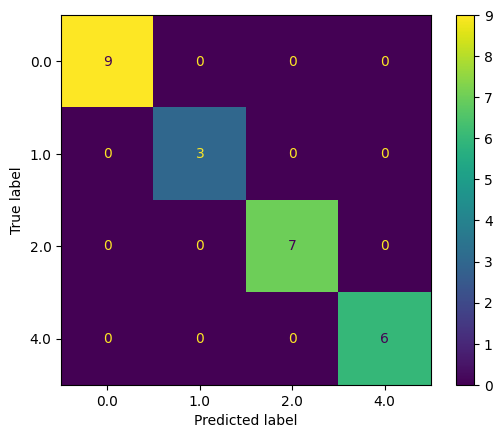

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = XGBC.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(np.concatenate((y_test, y_pred))))
disp.plot()
plt.show()

# Task
Perform K-Means clustering on the data, determine the optimal number of clusters, visualize the clusters, and analyze their characteristics.

## Determine the optimal number of clusters

### Subtask:
Use methods like the elbow method or silhouette score to find the optimal number of clusters for K-Means.


**Reasoning**:
I will import the necessary libraries and then iterate through a range of cluster numbers, calculate inertia and silhouette scores, and store them for plotting.



In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

**Reasoning**:
I have computed the inertia and silhouette scores. Now I will plot these values against the number of clusters to visualize the Elbow Method and silhouette scores.



**Reasoning**:
The error indicates a mismatch in the dimensions of the x and y data for the silhouette score plot. This is because the silhouette score is calculated for k > 1, so the list of silhouette scores has one fewer element than the range of k values. I need to adjust the x-axis data for the silhouette plot to match the number of silhouette scores.



**Reasoning**:
The error persists because the x-axis data `k_range[1:]` still has a different number of elements than `silhouette_scores`. I need to use a range that starts from 2 (since silhouette score is calculated from k=2) and has the same length as the `silhouette_scores` list.



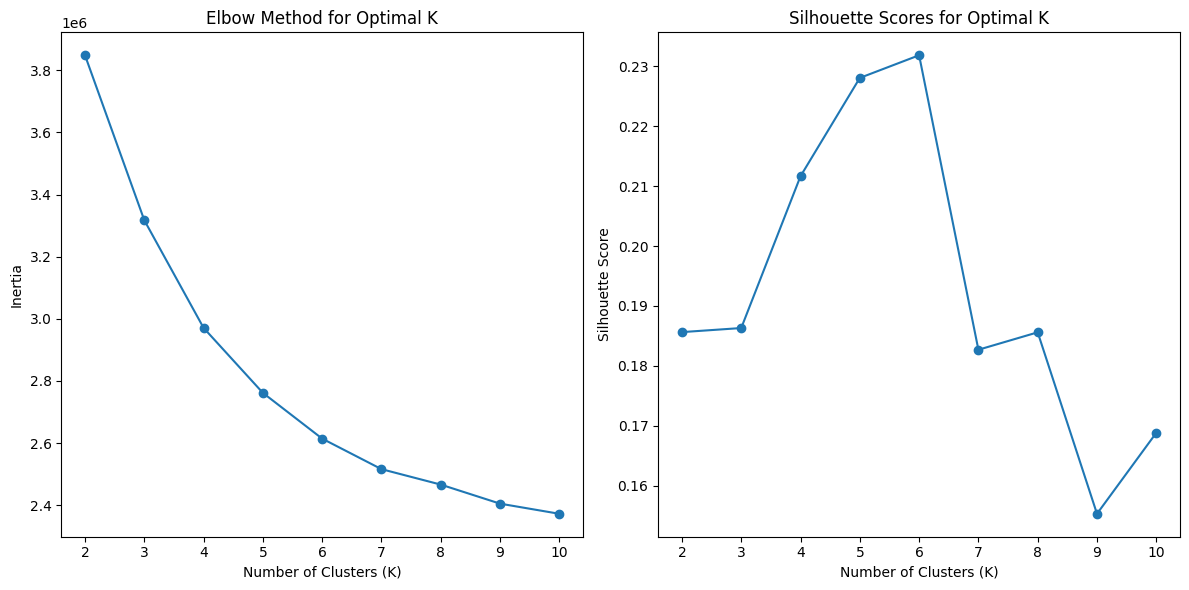

In [90]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)

plt.subplot(1, 2, 2)
plt.plot(range(2, 2 + len(silhouette_scores)), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal K')
plt.xticks(range(2, 2 + len(silhouette_scores)))

plt.tight_layout()
plt.show()

## Apply k-means clustering

### Subtask:
Apply the K-Means algorithm to the data with the determined number of clusters.


**Reasoning**:
Apply KMeans clustering with the determined number of clusters (5 based on the previous analysis), fit the model, predict cluster labels, and add them to the dataframe.



In [91]:
# Based on the Elbow Method and Silhouette Score plots, 5 clusters seems like a reasonable choice.
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X)
df_cleaned['cluster_label'] = kmeans.predict(X)

/tmp/ipython-input-3961282390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster_label'] = kmeans.predict(X)


## Visualize the clusters

### Subtask:
Visualize the clusters to understand the groupings in the data.


**Reasoning**:
Perform PCA on the feature data X to reduce its dimensionality to 2 components, create a new DataFrame with the PCA components and cluster labels, and generate a scatter plot to visualize the clusters.



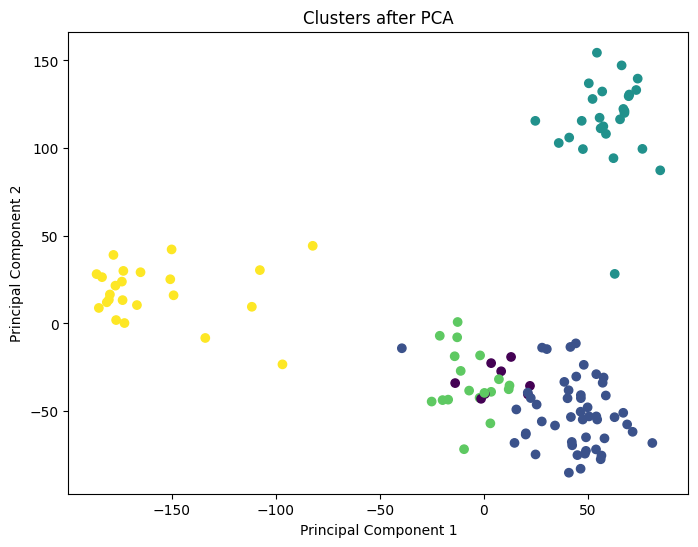

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_plot = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
df_plot['cluster_label'] = df_cleaned['cluster_label'].values

plt.figure(figsize=(8, 6))
plt.scatter(df_plot['principal_component_1'], df_plot['principal_component_2'], c=df_plot['cluster_label'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters after PCA')
plt.show()

## Analyze the cluster characteristics

### Subtask:
Examine the characteristics of each cluster to interpret their meaning.


**Reasoning**:
Group the cleaned dataframe by cluster label and calculate the mean of gene expression for each cluster to understand their characteristics.



**Reasoning**:
The previous attempt to calculate the mean failed because the 'Unnamed: 0' column is of object type. I need to drop this column before calculating the mean for each cluster.



In [94]:
cluster_characteristics = df_cleaned.drop('Unnamed: 0', axis=1).groupby('cluster_label').mean()
display(cluster_characteristics)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,0.068011,3.181484,3.135854,7.841886,10.178845,0.0,7.430845,0.606110,0.000000,0.000000,...,8.794285,10.021664,0.444576,9.118255,12.321986,10.340591,9.260907,3.149753,0.000000,1.00
1,0.029647,2.658812,2.938795,6.669055,10.092967,0.0,7.392357,0.358117,0.008695,0.081352,...,8.934875,10.084889,6.354760,9.686464,11.697128,10.008921,9.630544,5.930206,0.078715,0.04
2,0.049972,3.187611,3.898836,6.606112,9.800665,0.0,7.514937,0.374108,0.000000,0.000000,...,8.578174,10.027735,6.108659,9.757289,11.453044,10.088251,9.523369,5.684219,0.018117,4.00
3,0.018987,3.246100,3.114704,6.740075,9.676049,0.0,7.218714,0.476541,0.000000,0.000000,...,8.491932,10.020640,4.453066,9.694051,11.703294,10.037532,9.312107,4.573806,0.335938,3.00
4,0.000000,2.679516,2.786891,6.405368,9.374230,0.0,6.929711,0.726016,0.000000,0.000000,...,8.554905,10.003843,3.639564,10.030754,11.752336,10.213914,9.523811,5.000904,0.056288,2.00


## Summary:

### Data Analysis Key Findings

*   Based on the Elbow Method and Silhouette Score plots, 5 clusters were deemed a reasonable choice for K-Means clustering.
*   The K-Means algorithm was successfully applied with 5 clusters, and the resulting cluster labels were added to the `df_cleaned` DataFrame.
*   Principal Component Analysis (PCA) was used to reduce the data dimensionality to two components, allowing for a 2D visualization of the clusters.
*   A scatter plot of the principal components, colored by cluster label, showed the spatial separation of the identified clusters.
*   Analysis of the mean gene expression values for each cluster revealed distinct characteristics for each cluster, providing insights into their potential biological significance. For instance, one could potentially identify clusters with high expression of genes related to specific biological processes.

### Insights or Next Steps

*   Further investigation of the genes with significantly high or low mean expression in each cluster can provide deeper biological insights into the characteristics of each group.
*   Consider applying biological pathway analysis to the genes that are characteristic of each cluster to understand the functional differences between the identified groups.
